# Data Set 1



In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

df=pd.read_csv("salaries.csv")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [111]:
x=df.drop('salary_more_then_100k',axis=1)
y=df['salary_more_then_100k']

In [112]:
#ML works based on numbers and not labels. So, we make use of the label encoder

from sklearn.preprocessing import LabelEncoder

In [113]:
#One object for each column
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [114]:
x['company_n']=le_company.fit_transform(x['company'])
x['job_n']=le_company.fit_transform(x['job'])
x['degree_n']=le_company.fit_transform(x['degree'])
x.head()

company                  job     degree  company_n  job_n  degree_n
0  google      sales executive  bachelors          2      2         0
1  google      sales executive    masters          2      2         1
2  google     business manager  bachelors          2      0         0
3  google     business manager    masters          2      0         1
4  google  computer programmer  bachelors          2      1         0

In [115]:
#Drop the original columns with data since we have replaced them all with new column with labels

x_n=x.drop(['company','job','degree'],axis=1)
x_n

company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1

In [116]:
from sklearn import tree #Import tree module for decision tree

In [117]:
model=tree.DecisionTreeClassifier()

In [118]:
model.fit(x_n,y) #Training the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
model.score(x_n,y) #100% accurate model

1.0

In [120]:
#Predicing the salary of Sales executive having a Master's Degree working in Facebook

model.predict([[1,2,1]])

array([1])

In [121]:
df #Hence proved

company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     business manager    masters                      1
14    facebook  computer programmer  bachelors                      1
15    facebook  computer programmer    masters                      1

In [122]:
#Predicing the salary of Business Manager having a Master's Degree working in Facebook

model.predict([[2,0,1]])

array([1])

In [123]:
df

company                  job     degree  salary_more_then_100k
0       google      sales executive  bachelors                      0
1       google      sales executive    masters                      0
2       google     business manager  bachelors                      1
3       google     business manager    masters                      1
4       google  computer programmer  bachelors                      0
5       google  computer programmer    masters                      1
6   abc pharma      sales executive    masters                      0
7   abc pharma  computer programmer  bachelors                      0
8   abc pharma     business manager  bachelors                      0
9   abc pharma     business manager    masters                      1
10    facebook      sales executive  bachelors                      1
11    facebook      sales executive    masters                      1
12    facebook     business manager  bachelors                      1
13    facebook     business manager    masters                      1
14    facebook  computer programmer  bachelors                      1
15    facebook  computer programmer    masters                      1

In [124]:
feature_cols=['company','job','degree']

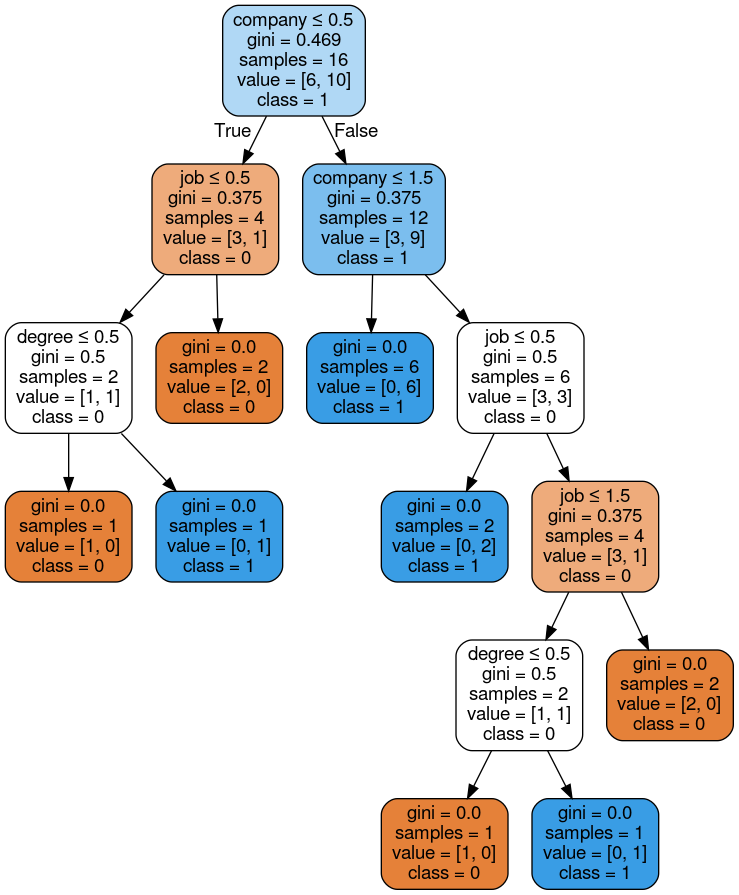

In [125]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())



# Data Set 2


In [126]:
#Predict the survival chaces of a passenger based on the Class,Sex,Age and Fare
df=pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [127]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [128]:
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [129]:
x=df.drop('Survived',axis=1)
y=df['Survived']


In [130]:
#Changing the 'Sex' Data to Integer values using Mapping technique

x.Sex = x.Sex.map({'male': 1, 'female': 2})
x.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [131]:
#Age columns has some NaN values. So we replace it with the mean.

x.Age=x.Age.fillna(x.Age.mean())

In [132]:
x.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [133]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
len(x_train)

712

In [135]:
len(x_test)

179

In [136]:
from sklearn import tree

model=tree.DecisionTreeClassifier()

In [137]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [138]:
model.score(x_test,y_test) #75% accurate

0.7541899441340782

In [139]:
#Predicting the survival chances of a Female First Class Passenger with Age 35 and Fare 80.25

model.predict([[1,2,35,80.25]])

array([1])

In [140]:
feature_cols = [ 'Pclass', 'Sex', 'Age','Fare']

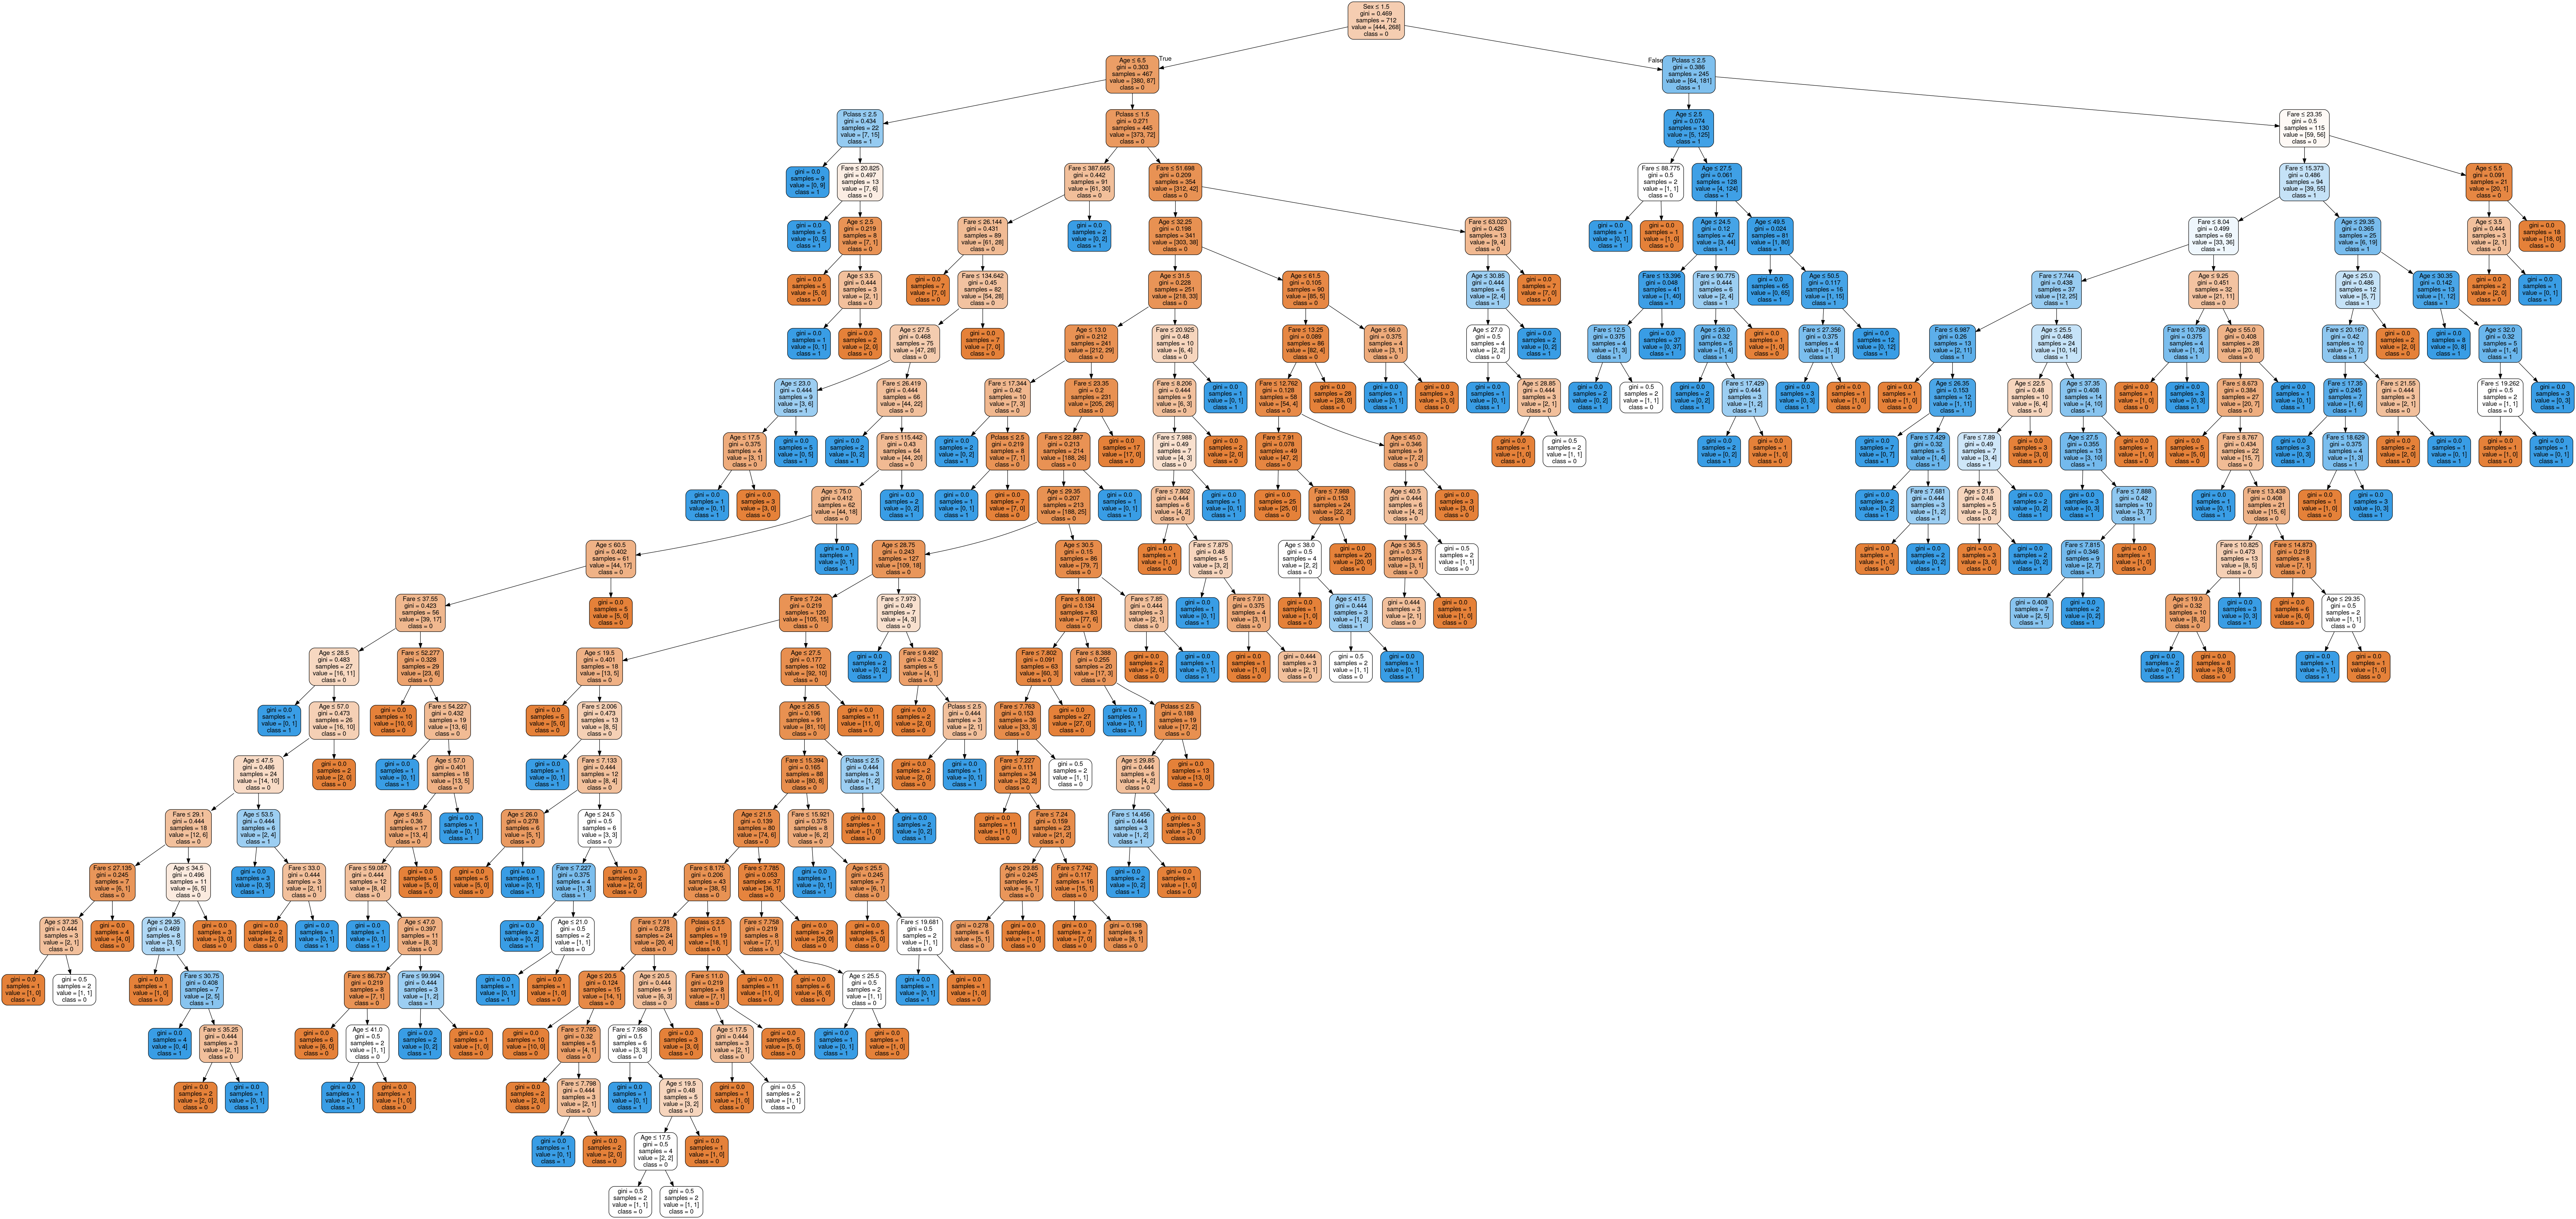

In [141]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


# Data Set 3


In [142]:
df=pd.read_excel("Games.xlsx")
df.head()

Outlook Temperature Humidity    Wind Played Football
0     Sunny         Hot     High    Weak              No
1     Sunny         Hot     High  Strong              No
2  Overcast         Hot     High    Weak             Yes
3      Rain        Mild     High    Weak             Yes
4      Rain        Cool   Normal    Weak             Yes

In [143]:
x=df.drop('Played Football',axis=1)
y=df['Played Football']

In [144]:
x.Outlook = x.Outlook.map({'Sunny': 1, 'Overcast': 2,'Rain':3})
x.Temperature = x.Temperature.map({'Hot': 1, 'Mild': 2,'Cool':3})
x.Humidity = x.Humidity.map({'High': 1, 'Normal': 2})
x.Wind = x.Wind.map({'Weak': 1, 'Strong': 2})

In [145]:
x.head()

Outlook  Temperature  Humidity  Wind
0        1            1         1     1
1        1            1         1     2
2        2            1         1     1
3        3            2         1     1
4        3            3         2     1

In [146]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Played Football, dtype: object

In [147]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [148]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
model.score(x_test,y_test) #Only 66% accurate

0.6666666666666666

In [150]:
df.head()

Outlook Temperature Humidity    Wind Played Football
0     Sunny         Hot     High    Weak              No
1     Sunny         Hot     High  Strong              No
2  Overcast         Hot     High    Weak             Yes
3      Rain        Mild     High    Weak             Yes
4      Rain        Cool   Normal    Weak             Yes

In [151]:
model.predict(x_test)


array(['Yes', 'No', 'No'], dtype=object)

In [152]:
#Predicting whether a game can be played on a Sunny Day with Mild Temp,High Humidity and Weak Wind
model.predict([[1,2,1,1]])

array(['No'], dtype=object)

In [153]:
feature_cols = [ 'Outlook', 'Temperature', 'Humidity','Wind']

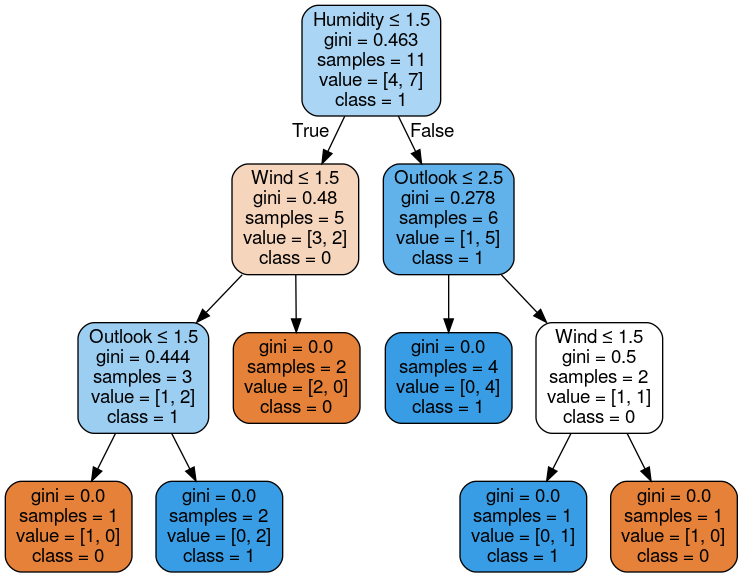

In [154]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('games.png')
Image(graph.create_png())

# Data Set 4


In [155]:


df=pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [156]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [157]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [158]:
from sklearn import tree

model=tree.DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [160]:
feature_cols = [ 'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

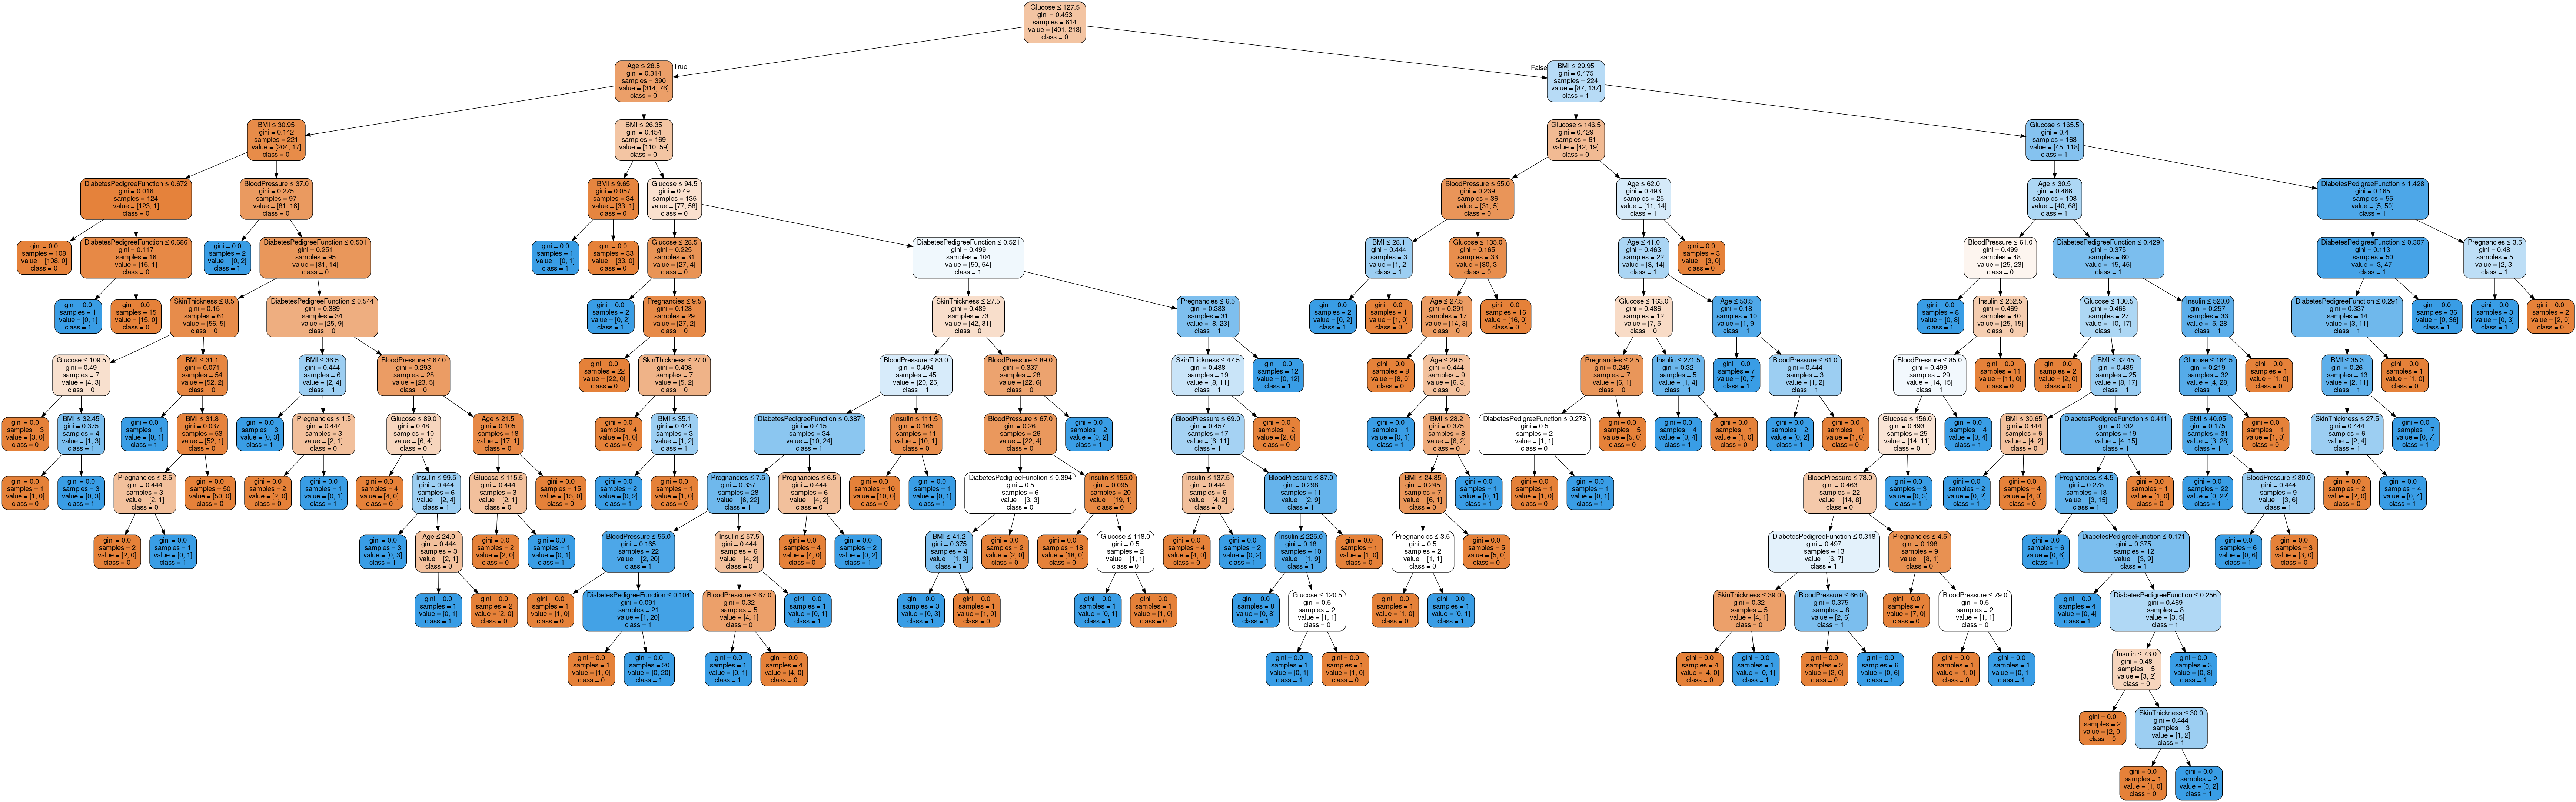

In [161]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())